In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Dataset: MNIST

In [2]:
mnist = datasets.load_digits()

In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
print(mnist['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [18]:
print('"images" key shape:', mnist['images'].shape)
print('"data" key shape:', mnist['data'].shape)

"images" key shape: (1797, 8, 8)
"data" key shape: (1797, 64)


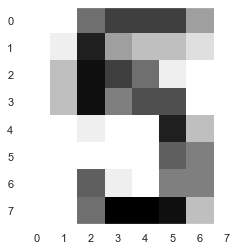

In [8]:
plt.imshow(mnist['images'][1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.grid(False)
plt.xticks(np.arange(8))
plt.show()

# Classification via k-NN

In [21]:
# Inputs
X = mnist['data']

# Output
y = mnist['target']

In [22]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Model
knn = KNeighborsClassifier(7)

# Training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
# Evaluation
acc = knn.score(X_test, y_test)
print(f'Accuracy is {acc*100: .2f}%')

Accuracy is  98.33%


# Model Complexity Curve

In [37]:
# Here, we check the train and test accuracies for different kNNs from 0 to 8 
neighbors = np.arange(1,9)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

In [38]:
for i, k in enumerate(neighbors):
    #Initiate model
    knn = KNeighborsClassifier(k)
    
    #Train
    knn.fit(X_train, y_train)
    
    #Record accuracies
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

<function matplotlib.pyplot.show(*args, **kw)>

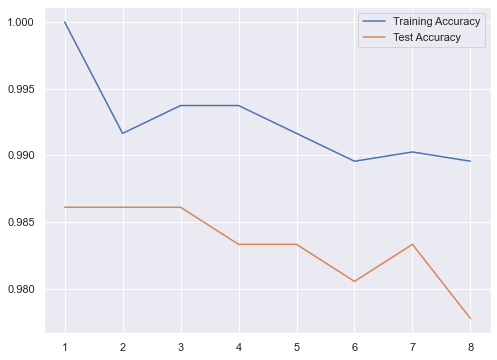

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(neighbors, train_acc, label='Training Accuracy')
ax.plot(neighbors, test_acc, label='Test Accuracy')

plt.legend()
plt.show